# Mushroom Dataset

## 1. Data Set Desciption
  - http://archive.ics.uci.edu/ml/datasets/Mushroom
  - Attribute Information
    - 0 - classes (target attribute): edible=e, poisonous=p
    - 1 - cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    - 2 - cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    - 3 - cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    - 4 - bruises: bruises=t, no=f
    - 5 - odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    - 6 - gill-attachment: attached=a, descending=d, free=f, notched=n
    - 7 - gill-spacing: close=c,crowded=w,distant=d
    - 8 - gill-size: broad=b, narrow=n
    - 9 - gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    - 10 - stalk-shape: enlarging=e, tapering=t
    - 11 - stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    - 12 - stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    - 13 - stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    - 14 - stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    - 15 - stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    - 16 - veil-type: partial=p, universal=u
    - 17 - veil-color: brown=n, orange=o, white=w, yellow=y
    - 18 - ring-number: none=n, one=o, two=t
    - 19 - ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    - 20 - spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    - 21 - population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    - 22 - habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## 2. Pandas DataFame 다루기

### 1) Loading Data

In [182]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib2.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)

In [183]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [184]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 2) Missing Value 찾기

In [185]:
df.isnull().head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [187]:
df.isnull().values.any()

False

### 2) DataFrame의 groupby 학습

In [188]:
temp_df = DataFrame([[1, 2], [1, 4], [5, 6], [5, 4], [5, 4]], columns=['A', 'B'])

In [189]:
temp_df

,A,B
0,1,2
1,1,4
2,5,6
3,5,4
4,5,4


#### - 컬럼 A로 그룹핑

In [190]:
groupby_temp_df = temp_df.groupby('A')

In [191]:
groupby_temp_df.groups

{1: [0, 1], 5: [2, 3, 4]}

In [192]:
groupby_temp_df.get_group(1)

,A,B
0,1,2
1,1,4


In [193]:
groupby_temp_df.get_group(5)

,A,B
2,5,6
3,5,4
4,5,4


- 각 그룹마다 존재하는 아이템의 개수 반환

In [194]:
groupby_temp_df.count()

,B
A,
1,2
5,3


- 각 그룹마다 n 개씩의 row를 반환하는 방법

In [195]:
groupby_temp_df.head(1)

,A,B
0,1,2
2,5,6


In [196]:
groupby_temp_df.describe()

A         B
A                   
1 count  2  2.000000
  mean   1  3.000000
  std    0  1.414214
  min    1  2.000000
  25%    1  2.500000
  50%    1  3.000000
  75%    1  3.500000
  max    1  4.000000
5 count  3  3.000000
  mean   5  4.666667
  std    0  1.154701
  min    5  4.000000
  25%    5  4.000000
  50%    5  4.000000
  75%    5  5.000000
  max    5  6.000000

#### - 컬럼 B로 그룹핑

In [197]:
groupby_temp_df2 = temp_df.groupby('B')

In [198]:
groupby_temp_df2.groups

{2: [0], 4: [1, 3, 4], 6: [2]}

In [199]:
groupby_temp_df2.get_group(2)

,A,B
0,1,2


In [200]:
groupby_temp_df2.get_group(4)

,A,B
1,1,4
3,5,4
4,5,4


In [201]:
groupby_temp_df2.get_group(6)

,A,B
2,5,6


In [202]:
groupby_temp_df2.count()

,A
B,
2,1
4,3
6,1


In [203]:
groupby_temp_df2.head(1)

,A,B
0,1,2
1,1,4
2,5,6


In [204]:
groupby_temp_df2.describe()

A   B
B                    
2 count  1.000000   1
  mean   1.000000   2
  std         NaN NaN
  min    1.000000   2
  25%    1.000000   2
  50%    1.000000   2
  75%    1.000000   2
  max    1.000000   2
4 count  3.000000   3
  mean   3.666667   4
  std    2.309401   0
  min    1.000000   4
  25%    3.000000   4
  50%    5.000000   4
  75%    5.000000   4
  max    5.000000   4
6 count  1.000000   1
  mean   5.000000   6
  std         NaN NaN
  min    5.000000   6
  25%    5.000000   6
  50%    5.000000   6
  75%    5.000000   6
  max    5.000000   6

### 4) Mushroom 데이터의 각 속성별로 그룹핑 작업을 위한 정보 확인

In [205]:
df[[0,1]]

,0,1
0,p,x
1,e,x
2,e,b
3,p,x
4,e,x
5,e,x
6,e,b
7,e,b
8,p,x
9,e,b


In [206]:
a = df[[0,1]].groupby(1)

In [207]:
print type(a)

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [208]:
print a.groups

{'c': [5126, 5508, 7401, 7706], 'b': [2, 6, 7, 9, 12, 20, 22, 23, 24, 30, 34, 39, 40, 52, 55, 57, 61, 62, 63, 64, 71, 74, 86, 91, 98, 101, 104, 107, 108, 126, 129, 130, 131, 139, 141, 148, 149, 156, 158, 159, 160, 161, 166, 167, 169, 171, 173, 175, 176, 177, 179, 186, 188, 192, 196, 201, 206, 207, 208, 209, 211, 215, 225, 229, 234, 237, 253, 254, 255, 258, 259, 268, 281, 284, 286, 287, 291, 293, 295, 301, 303, 306, 314, 323, 325, 328, 329, 331, 332, 333, 337, 341, 344, 352, 353, 368, 375, 377, 379, 383, 388, 390, 392, 400, 401, 403, 406, 415, 421, 427, 432, 433, 435, 438, 448, 451, 452, 454, 456, 457, 462, 468, 477, 479, 480, 481, 495, 499, 501, 503, 504, 511, 517, 521, 525, 536, 546, 560, 564, 569, 573, 596, 597, 604, 605, 615, 617, 618, 621, 628, 629, 631, 635, 640, 646, 647, 651, 657, 660, 664, 665, 679, 683, 687, 690, 691, 695, 696, 703, 706, 709, 713, 714, 715, 716, 728, 735, 741, 743, 746, 747, 751, 753, 754, 755, 758, 760, 768, 769, 771, 779, 782, 790, 796, 800, 803, 804, 806, 8

In [209]:
a.count()

,0
1,
b,452
c,4
f,3152
k,828
s,32
x,3656


In [210]:
a.head(2)

,0
0,p
1,e
2,e
6,e
15,e
16,e
25,p
36,e
4276,e
4291,e


In [211]:
a.groups.keys()

['c', 'b', 'f', 'k', 's', 'x']

In [212]:
a.size()

1
b     452
c       4
f    3152
k     828
s      32
x    3656
dtype: int64

In [213]:
a.ngroups

6

In [214]:
a.get_group("c")

,0
5126,p
5508,p
7401,p
7706,p


In [215]:
a.describe()

0
1             
b count    452
  unique     2
  top        e
  freq     404
c count      4
  unique     1
  top        p
  freq       4
f count   3152
  unique     2
  top        e
  freq    1596
k count    828
  unique     2
  top        p
  freq     600
s count     32
  unique     1
  top        e
  freq      32
x count   3656
  unique     2
  top        e
  freq    1948

### 5) 각 속성별 주요 정보를 담은 df_per_attr 사전 만들기

In [216]:
df_per_attr = {}
for i in range(1, 23):
    df_per_attr[i] = {}
    groupby_df = df[[0, i]].groupby(i)
    df_per_attr[i]['ngorups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [217]:
df_per_attr[1]['group_keys']

['c', 'b', 'f', 'k', 's', 'x']

In [218]:
df_per_attr[1]['subgroups'][0]

,0,1
5126,p,c
5508,p,c
7401,p,c
7706,p,c


### 6) Categorical Attribute를 Numerical Attribute로 변환

In [219]:
df[0] = df[0].map({'p': 1, 'e': 0})
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,0,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,0,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,1,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,0,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [220]:
print df.shape[0], df.shape[1]

8124 23


In [221]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


In [233]:
map_dic

{0: {0: 1, 1: 0},
 1: {'b': 1, 'c': 5, 'f': 3, 'k': 4, 's': 2, 'x': 0},
 2: {'f': 2, 'g': 3, 's': 0, 'y': 1},
 3: {'b': 6,
  'c': 8,
  'e': 4,
  'g': 3,
  'n': 0,
  'p': 5,
  'r': 9,
  'u': 7,
  'w': 2,
  'y': 1},
 4: {'f': 1, 't': 0},
 5: {'a': 1, 'c': 5, 'f': 4, 'l': 2, 'm': 8, 'n': 3, 'p': 0, 's': 7, 'y': 6},
 6: {'a': 1, 'f': 0},
 7: {'c': 0, 'w': 1},
 8: {'b': 1, 'n': 0},
 9: {'b': 8,
  'e': 7,
  'g': 2,
  'h': 5,
  'k': 0,
  'n': 1,
  'o': 11,
  'p': 3,
  'r': 9,
  'u': 6,
  'w': 4,
  'y': 10},
 10: {'e': 0, 't': 1},
 11: {'?': 4, 'b': 2, 'c': 1, 'e': 0, 'r': 3},
 12: {'f': 1, 'k': 2, 's': 0, 'y': 3},
 13: {'f': 1, 'k': 3, 's': 0, 'y': 2},
 14: {'b': 4, 'c': 7, 'e': 5, 'g': 1, 'n': 3, 'o': 6, 'p': 2, 'w': 0, 'y': 8},
 15: {'b': 3, 'c': 8, 'e': 5, 'g': 2, 'n': 4, 'o': 7, 'p': 1, 'w': 0, 'y': 6},
 16: {'p': 0},
 17: {'n': 1, 'o': 2, 'w': 0, 'y': 3},
 18: {'n': 2, 'o': 0, 't': 1},
 19: {'e': 1, 'f': 3, 'l': 2, 'n': 4, 'p': 0},
 20: {'b': 8, 'h': 3, 'k': 0, 'n': 1, 'o': 6, 'r': 5, 'u

In [223]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,...,0.994584,1.149680,1.061546,0,0.038405,0.082718,0.696209,2.200886,2.687839,2.794682
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.333097,1.563541,1.648595,0,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,...,3.000000,2.000000,1.000000,0,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [224]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)
    df[i] = df[i].map(map_dic_sub)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0,0.125,0,0,1,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0,0.250,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1,0.375,0,1,1,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.25,0.125,0.4,0.166667
5,1,0.0,0.333333,0.111111,0,0.125,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.2,0.166667
6,1,0.2,0.000000,0.222222,0,0.125,0,0,1,0.181818,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.2,0.333333
7,1,0.2,0.333333,0.222222,0,0.250,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.0,0.333333
8,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.272727,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.6,0.166667
9,1,0.2,0.000000,0.111111,0,0.125,0,0,1,0.181818,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.333333


In [225]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.327523,0.323978,0.232617,0.584441,0.448671,0.025849,0.161497,0.690793,0.388568,...,0.331528,0.143710,0.132693,0,0.012802,0.041359,0.174052,0.275111,0.537568,0.465780
std,0.499708,0.317794,0.258511,0.193866,0.492848,0.194714,0.158695,0.368011,0.462195,0.242696,...,0.444366,0.195443,0.206074,0,0.085946,0.145558,0.196733,0.217778,0.276240,0.269591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.181818,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.125000,0.400000,0.166667
50%,1.000000,0.200000,0.333333,0.222222,1.000000,0.375000,0.000000,0.000000,1.000000,0.363636,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.250000,0.375000,0.600000,0.500000
75%,1.000000,0.600000,0.666667,0.333333,1.000000,0.500000,0.000000,0.000000,1.000000,0.545455,...,1.000000,0.250000,0.125000,0,0.000000,0.000000,0.250000,0.500000,0.800000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7) Edible Mushrooms과 Poisonous Mushrooms 의 두 개의 그룹핑 작업 및 각 그룹별 Boxplot 그리기
- Typical Scematic Box Plot
  - http://goo.gl/qh2ILu
  - http://www.sfu.ca/~jackd/Stat203/Wk02_1_Full.pdf
![Box Plot 설명](boxplot.png)

In [226]:
df_edible = df[df[0] == 0]    # 0: edible
df_poisonous = df[df[0] == 1] # 1: poisonous

In [227]:
df_edible.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,3916,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,...,3916.000000,3916.000000,3916.000000,3916,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000
mean,0,0.364454,0.278515,0.241062,0.840654,0.566139,0.004597,0.028601,0.432074,0.492432,...,0.576779,0.189351,0.153728,0,0.002043,0.018386,0.287538,0.401685,0.582022,0.519237
std,0,0.331386,0.243088,0.195300,0.366045,0.213075,0.067650,0.166702,0.495428,0.236910,...,0.481331,0.192389,0.195711,0,0.045158,0.115996,0.193596,0.138892,0.205576,0.288464
min,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.272727,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.250000,0.375000,0.600000,0.166667
50%,0,0.600000,0.333333,0.222222,1.000000,0.500000,0.000000,0.000000,0.000000,0.454545,...,1.000000,0.250000,0.125000,0,0.000000,0.000000,0.250000,0.375000,0.600000,0.500000
75%,0,0.600000,0.333333,0.444444,1.000000,0.750000,0.000000,0.000000,1.000000,0.727273,...,1.000000,0.250000,0.125000,0,0.000000,0.000000,0.500000,0.500000,0.600000,0.666667
max,0,1.000000,1.000000,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,...,1.000000,1.000000,1.000000,0,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000


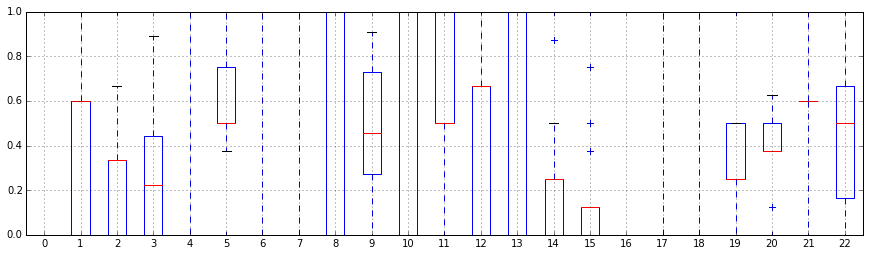

In [228]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_edible.boxplot(ax=ax)
plt.show()

In [230]:
df_poisonous.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,4208,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,...,4208.000000,4208.000000,4208.000000,4208,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000
mean,1,0.293156,0.366286,0.224757,0.346008,0.339354,0.045627,0.285171,0.931559,0.291912,...,0.103295,0.101236,0.113118,0,0.022814,0.062738,0.068441,0.157319,0.496198,0.416033
std,0,0.300591,0.265197,0.192212,0.475752,0.078467,0.208700,0.451550,0.252531,0.205210,...,0.239945,0.188588,0.213440,0,0.110257,0.165648,0.129258,0.211734,0.323201,0.240334
min,1,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,1.000000,0.090909,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.200000,0.166667
50%,1,0.200000,0.333333,0.222222,0.000000,0.375000,0.000000,0.000000,1.000000,0.272727,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.125000,0.600000,0.500000
75%,1,0.600000,0.666667,0.333333,1.000000,0.375000,0.000000,1.000000,1.000000,0.363636,...,0.000000,0.125000,0.125000,0,0.000000,0.000000,0.250000,0.125000,0.800000,0.500000
max,1,0.800000,0.666667,1.000000,1.000000,0.375000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.750000,0.875000,0,0.666667,0.500000,0.750000,1.000000,1.000000,1.000000


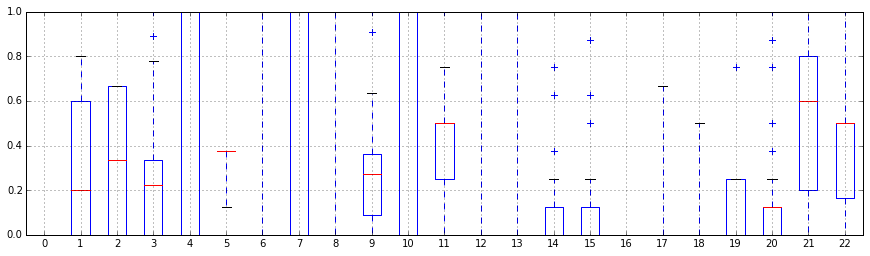

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

### 8) 두 그룹간에 확연하게 차이를 보이는 속성들에 대한 EDA 작업
- 속성 4 (bruises: bruises=t (0), no=f (1))

In [234]:
map_dic[4]

{'f': 1, 't': 0}

In [268]:
df_edible_4 = df_edible[[0, 4]]
df_edible_4.describe()

,0,4
count,3916,3916.000000
mean,0,0.840654
std,0,0.366045
min,0,0.000000
25%,0,1.000000
50%,0,1.000000
75%,0,1.000000
max,0,1.000000


In [269]:
df_edible_groupby_4 = df_edible_4.groupby(4)
df_edible_groupby_4.count()

,0
4,
0,624
1,3292


In [270]:
df_poisonous_4 = df_poisonous[[0, 4]]
df_poisonous_4.describe()

,0,4
count,4208,4208.000000
mean,1,0.346008
std,0,0.475752
min,1,0.000000
25%,1,0.000000
50%,1,0.000000
75%,1,1.000000
max,1,1.000000


In [271]:
df_poisonous_groupby_4 = df_poisonous_4.groupby(4)
df_poisonous_groupby_4.count()

,0
4,
0,2752
1,1456


- 속성 5 (odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s)

In [250]:
map_dic[5]

{'a': 1, 'c': 5, 'f': 4, 'l': 2, 'm': 8, 'n': 3, 'p': 0, 's': 7, 'y': 6}

In [272]:
df_edible_5 = df_edible[[0, 5]]
df_edible_5.describe()

,0,5
count,3916,3916.000000
mean,0,0.566139
std,0,0.213075
min,0,0.000000
25%,0,0.500000
50%,0,0.500000
75%,0,0.750000
max,0,1.000000


In [273]:
df_edible_groupby_5 = df_edible_5.groupby(5)
df_edible_groupby_5.count()

,0
5,
0.000,256
0.375,120
0.500,2160
0.625,192
0.750,576
0.875,576
1.000,36


In [274]:
df_poisonous_5 = df_poisonous[[0, 5]]
df_poisonous_5.describe()

,0,5
count,4208,4208.000000
mean,1,0.339354
std,0,0.078467
min,1,0.125000
25%,1,0.375000
50%,1,0.375000
75%,1,0.375000
max,1,0.375000


In [275]:
df_poisonous_groupby_5 = df_poisonous_5.groupby(5)
df_poisonous_groupby_5.count()

,0
5,
0.125,400
0.250,400
0.375,3408


- 속성 16 (veil-type: partial=p, universal=u)

In [276]:
map_dic[16]

{'p': 0}

- 속성 17 (veil-color: brown=n, orange=o, white=w, yellow=y)

In [277]:
map_dic[17]

{'n': 1, 'o': 2, 'w': 0, 'y': 3}

In [278]:
df_edible_17 = df_edible[[0, 17]]
df_edible_17.describe()

,0,17
count,3916,3916.000000
mean,0,0.002043
std,0,0.045158
min,0,0.000000
25%,0,0.000000
50%,0,0.000000
75%,0,0.000000
max,0,1.000000


In [280]:
df_edible_groupby_17 = df_edible_17.groupby(17)
df_edible_groupby_17.count()

,0
17,
0,3908
1,8


In [281]:
df_poisonous_17 = df_poisonous[[0, 17]]
df_poisonous_17.describe()

,0,17
count,4208,4208.000000
mean,1,0.022814
std,0,0.110257
min,1,0.000000
25%,1,0.000000
50%,1,0.000000
75%,1,0.000000
max,1,0.666667


In [282]:
df_poisonous_groupby_17 = df_poisonous_17.groupby(17)
df_poisonous_groupby_17.count()

,0
17,
0.000000,4016
0.333333,96
0.666667,96
